## 常用机器学习包

from sklearn.linear_model import LinearRegression           # 线性回归
from sklearn.linear_model import LogisticRegression         # 逻辑回归
from sklearn.naive_bayes import GaussianNB                  # 高级朴素贝叶斯
from sklearn.decomposition import PCA                       # 主成分分析
from sklearn.mixture import GaussianMixture                 # 高斯混合模型
from sklearn.preprocessing import PolynomialFeatures        # 多项式回归
from sklearn.tree import DecisionTreeClassifier             # 决策树
from sklearn.ensemble import RandomForestRegressor          # 随机森林
from sklearn.ensemble import RandomForestClassifier         # 随机森林分类
from sklearn import datasets                                # 导入示例数据
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 导入示例数据

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


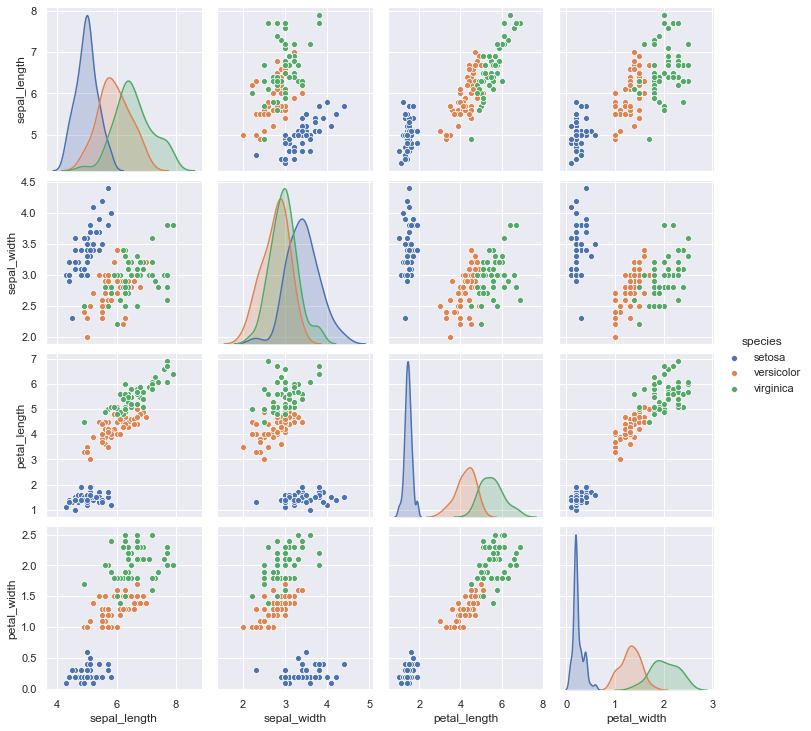

In [4]:
iris = sns.load_dataset('iris')
print(iris.head())
sns.set()
sns.pairplot(iris,hue='species')

In [3]:
# x_iris = iris.drop('species',axis=1)
x_iris = iris.iloc[:,0:4]
y_iris = iris.species
print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


## 数据切分

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_iris,y_iris,test_size = 0.3, random_state = 0)

print("原始数据特征:",x_iris.shape,
      ",训练数据特征:",x_train.shape,
      ",测试数据特征:",x_test.shape)
 
print("原始数据标签:",y_iris.shape,
      ",训练数据标签:",y_train.shape,
      ",测试数据标签:",y_test.shape)

原始数据特征: (150, 4) ,训练数据特征: (105, 4) ,测试数据特征: (45, 4)
原始数据标签: (150,) ,训练数据标签: (105,) ,测试数据标签: (45,)


## 数据标准化

In [5]:
from sklearn.preprocessing import StandardScaler
iris['sepal_length_1'] = StandardScaler().fit_transform(iris['sepal_length'].values.reshape(-1, 1))
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_1
0,5.1,3.5,1.4,0.2,setosa,-0.900681
1,4.9,3.0,1.4,0.2,setosa,-1.143017
2,4.7,3.2,1.3,0.2,setosa,-1.385353
3,4.6,3.1,1.5,0.2,setosa,-1.506521
4,5.0,3.6,1.4,0.2,setosa,-1.021849
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.038005
146,6.3,2.5,5.0,1.9,virginica,0.553333
147,6.5,3.0,5.2,2.0,virginica,0.795669
148,6.2,3.4,5.4,2.3,virginica,0.432165


In [6]:
from sklearn.preprocessing import StandardScaler
x_iris = iris.drop('species',axis=1)
X_std = StandardScaler().fit_transform(x_iris)
print (X_std)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00
  -9.00681170e-01]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00
  -1.14301691e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00
  -1.38535265e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00
  -1.50652052e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00
  -1.02184904e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00
  -5.37177559e-01]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00
  -1.50652052e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00
  -1.02184904e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00
  -1.74885626e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00
  -1.14301691e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00
  -5.37177559e-01]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00

## 交叉验证

In [7]:
from sklearn.metrics import confusion_matrix,log_loss # 评估
from sklearn.model_selection import KFold, cross_val_score
import time
kf = KFold(n_splits=5,shuffle=True)
for train_k,test_k in kf.split(x_train):
    print(train_k,test_k)

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  16  17  18  21
  22  23  24  25  27  28  29  30  31  34  35  36  37  38  39  40  41  42
  43  44  45  47  48  49  50  51  53  55  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  80  82  84  85  86
  87  88  89  90  91  92  93  95 100 102 103 104] [ 11  15  19  20  26  32  33  46  52  54  56  66  68  81  83  94  96  97
  98  99 101]
[  1   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  31  32  33  35  36  37  38  39  40  41  42
  43  44  46  47  50  51  52  53  54  56  58  59  60  61  63  65  66  68
  69  71  72  73  74  75  76  77  78  80  81  82  83  84  85  86  88  89
  90  91  93  94  95  96  97  98  99 100 101 103] [  0   2  10  13  29  30  34  45  48  49  55  57  62  64  67  70  79  87
  92 102 104]
[  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  17  19  20
  22  24  26  27  28  29  30  31  32  33  34  38  39  40  42  44  45 

In [8]:
#示例

# print('Finding best n_estimators for RandomForestClassifier...')
# min_score =100000
# best_n = 0
# scores_n = []
# range_n = np.logspace(0,2,num=100).astype(int)
# # range_n = range(1,100)
# for n in range_n:
#     print("the number of trees : {0}".format(n))
#     t1 = time.time()
    
#     rfc_score = 0.
#     rfc = RandomForestClassifier(n_estimators=n)
#     kf = KFold(n_splits=6,shuffle=True)
#     for train_k,test_k in kf.split(x_train):
#         rfc.fit(x_train.iloc[train_k], y_train.iloc[train_k])

#         pred = rfc.predict(x_train.iloc[test_k])
#         rfc_score += log_loss(y_train.iloc[test_k], pred) / 10
#     scores_n.append(rfc_score)
#     if rfc_score < min_score:
#         min_score = rfc_score
#         best_n = n
    
#     t2 = time.time()
#     print('Done processing {0} trees ({1:.3f}sec)'.format(n, t2-t1))
# print(best_n,min_score)

## 热编码

### 自己编码

In [9]:
# 自己编码
print (iris["species"].unique())
iris["species"] = iris["species"].fillna('S')
# iris.loc[iris["species"] == 'setosa', "Embarked"] = 0
# iris.loc[iris["species"] == 'versicolor', "Embarked"] = 1
# iris.loc[iris["species"] == 'virginica'， "Embarked"] = 2

['setosa' 'versicolor' 'virginica']


### replace方法

In [ ]:
# replace方法
# loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

# status_replace = {
#     "loan_status" : {
#         "Fully Paid": 1,
#         "Charged Off": 0,
#     }
# }

# loans_2007 = loans_2007.replace(status_replace)

### LabelEncoder方法

In [ ]:
# LabelEncoder方法
# from sklearn.preprocessing import LabelEncoder

# gle = LabelEncoder()
# genre_labels = gle.fit_transform(vg_df['Genre'])
# # genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
# # genre_mappings
# vg_df['GenreLabel'] = genre_labels
# vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

### 独立热编码

In [10]:
print(iris["species"].value_counts())
pd.get_dummies(iris["species"],prefix='combined_shot_type')

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


,combined_shot_type_setosa,combined_shot_type_versicolor,combined_shot_type_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [11]:
iris1 = pd.concat([iris,pd.get_dummies(iris["species"],prefix='species')],axis=1)
iris1

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_1,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1,0,0
1,4.9,3.0,1.4,0.2,setosa,-1.143017,1,0,0
2,4.7,3.2,1.3,0.2,setosa,-1.385353,1,0,0
3,4.6,3.1,1.5,0.2,setosa,-1.506521,1,0,0
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1,0,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.038005,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0.553333,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0.795669,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0.432165,0,0,1


In [12]:
# categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
# for var in categorical_vars:
#     raw = pd.concat([raw,pd.get_dummies(raw[var],prefix='var')],axis=1)
#     raw.drop(var,axis=1,inplace=True)

In [2]:
# 示例

# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# # 完成LabelEncoder
# gen_le = LabelEncoder()
# gen_labels = gen_le.fit_transform(poke_df['Generation'])
# poke_df['Gen_Label'] = gen_labels

# poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary']]

# # 完成OneHotEncoder
# gen_ohe = OneHotEncoder()
# gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
# gen_feature_labels = list(gen_le.classes_)

# # 将转换好的特征组合到dataframe中
# gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)
# poke_df_ohe = pd.concat([poke_df_sub, gen_features], axis=1)
# poke_df_ohe.head()

### 二值编码

In [17]:
# 方法1
# watched = np.array(popsong_df['listen_count']) 
# watched[watched >= 1] = 1
# popsong_df['watched'] = watched
# popsong_df.head(10)

In [18]:
# 方法2
# from sklearn.preprocessing import Binarizer

# bn = Binarizer(threshold=0.9)
# pd_watched = bn.transform([popsong_df['listen_count']])[0]
# popsong_df['pd_watched'] = pd_watched
# popsong_df.head(10)

### 分段编码

In [5]:
#
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0, 0.5, 'Frequency')

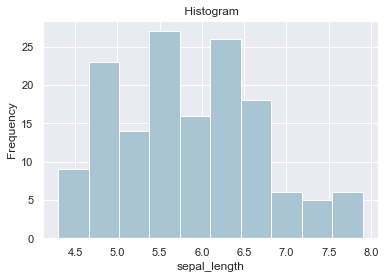

In [7]:
fig, ax = plt.subplots()
iris['sepal_length'].hist(color='#A9C5D3')
ax.set_title(' Histogram', fontsize=12)
ax.set_xlabel('sepal_length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [12]:
iris['length_bin_round'] = np.array(np.floor(np.array(iris['sepal_length']) / 1.))
iris[71:86]

,sepal_length,sepal_width,petal_length,petal_width,species,length_bin_round
71,6.1,2.8,4.0,1.3,versicolor,6.0
72,6.3,2.5,4.9,1.5,versicolor,6.0
73,6.1,2.8,4.7,1.2,versicolor,6.0
74,6.4,2.9,4.3,1.3,versicolor,6.0
75,6.6,3.0,4.4,1.4,versicolor,6.0
76,6.8,2.8,4.8,1.4,versicolor,6.0
77,6.7,3.0,5.0,1.7,versicolor,6.0
78,6.0,2.9,4.5,1.5,versicolor,6.0
79,5.7,2.6,3.5,1.0,versicolor,5.0
80,5.5,2.4,3.8,1.1,versicolor,5.0


In [ ]:
# qcut 方法
# weight_categories = ["vlow_weight",
#                      "low_weight",
#                      "mid_weight",
#                      "high_weight",
#                      "vhigh_weight",
#                     ]

# players['weightclass'] = pd.qcut(players['weight'],
#                                  len(weight_categories),
#                                  weight_categories)

### 分位数编码

Text(0, 0.5, 'Frequency')

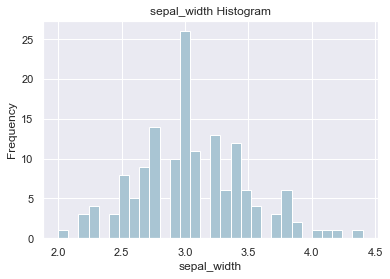

In [13]:
fig, ax = plt.subplots()
iris['sepal_width'].hist(bins=30, color='#A9C5D3')
ax.set_title('sepal_width Histogram', fontsize=12)
ax.set_xlabel('sepal_width', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [14]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = iris['sepal_width'].quantile(quantile_list)
quantiles

0.00    2.0
0.25    2.8
0.50    3.0
0.75    3.3
1.00    4.4
Name: sepal_width, dtype: float64

Text(0, 0.5, 'Frequency')

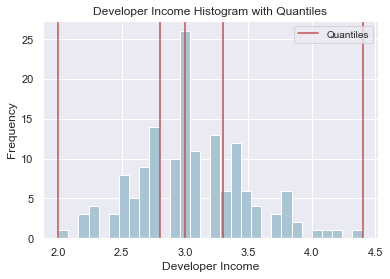

In [15]:
fig, ax = plt.subplots()
iris['sepal_width'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [16]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
iris['sepal_width_q'] = pd.qcut(iris['sepal_width'], 
                                                 q=quantile_list)
iris['sepal_width_p']= pd.qcut(iris['sepal_width'], 
                                                 q=quantile_list, labels=quantile_labels)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,length_bin_round,sepal_width_q,sepal_width_p
0,5.1,3.5,1.4,0.2,setosa,5.0,"(3.3, 4.4]",75-100Q
1,4.9,3.0,1.4,0.2,setosa,4.0,"(2.8, 3.0]",25-50Q
2,4.7,3.2,1.3,0.2,setosa,4.0,"(3.0, 3.3]",50-75Q
3,4.6,3.1,1.5,0.2,setosa,4.0,"(3.0, 3.3]",50-75Q
4,5.0,3.6,1.4,0.2,setosa,5.0,"(3.3, 4.4]",75-100Q
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6.0,"(2.8, 3.0]",25-50Q
146,6.3,2.5,5.0,1.9,virginica,6.0,"(1.999, 2.8]",0-25Q
147,6.5,3.0,5.2,2.0,virginica,6.0,"(2.8, 3.0]",25-50Q
148,6.2,3.4,5.4,2.3,virginica,6.0,"(3.3, 4.4]",75-100Q


## 过采样、下采样

In [13]:
# 下采样示例

# X = data.loc[:, data.columns != 'Class']
# y = data.loc[:, data.columns == 'Class']

# # Number of data points in the minority class
# number_records_fraud = len(data[data.Class == 1])
# fraud_indices = np.array(data[data.Class == 1].index)

# # Picking the indices of the normal classes
# normal_indices = data[data.Class == 0].index

# # Out of the indices we picked, randomly select "x" number (number_records_fraud)
# random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
# random_normal_indices = np.array(random_normal_indices)

# # Appending the 2 indices
# under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# # Under sample dataset
# under_sample_data = data.iloc[under_sample_indices,:]

# X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
# y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# # Showing ratio
# print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
# print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
# print("Total number of transactions in resampled data: ", len(under_sample_data))

In [14]:
# random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
# random_normal_indices 

## PCA主成分分析 数据降维

In [15]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)
X_2D = model.transform(x_iris)
print(X_2D)

[[-2.80998089e+00 -4.71679941e-01]
 [-2.94518776e+00  1.94248041e-02]
 [-3.20538952e+00  1.09168899e-01]
 [-3.12801999e+00  3.53457738e-01]
 [-2.90129780e+00 -4.07672531e-01]
 [-2.28620809e+00 -8.71753018e-01]
 [-3.19364118e+00  1.79690496e-01]
 [-2.81017930e+00 -2.65661827e-01]
 [-3.36112064e+00  6.50681790e-01]
 [-2.90666768e+00 -1.42879106e-02]
 [-2.49233860e+00 -8.84781392e-01]
 [-2.90169462e+00  4.36369694e-03]
 [-3.06200198e+00  1.15188753e-01]
 [-3.71741397e+00  5.79763573e-01]
 [-2.40720174e+00 -1.61871313e+00]
 [-2.22159548e+00 -1.55527661e+00]
 [-2.59647987e+00 -1.02483592e+00]
 [-2.77770830e+00 -4.51566490e-01]
 [-2.05808051e+00 -1.18762868e+00]
 [-2.72046619e+00 -5.68905732e-01]
 [-2.31687688e+00 -6.52629973e-01]
 [-2.68141832e+00 -4.96922292e-01]
 [-3.54973610e+00 -9.72458352e-02]
 [-2.46690873e+00 -1.92787434e-01]
 [-2.66899079e+00  1.19175873e-01]
 [-2.70551024e+00 -1.99111444e-02]
 [-2.66806617e+00 -1.87164200e-01]
 [-2.64787131e+00 -5.49286615e-01]
 [-2.71866398e+00 -5

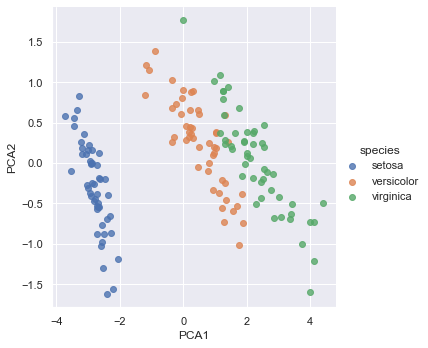

In [16]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot('PCA1','PCA2',hue='species',data = iris,fit_reg=False)

## 常用算法

### 定义分类器

In [4]:
# 分类器
from sklearn.model_selection import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(n_splits=5,shuffle=True)
    y_pred = y.copy()

    # Iterate through folds
    for train_index, test_index in kf.split(len(y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print ("Support vector machines:")
print ("%.3f" % accuracy(y, run_cv(X,y,SVC)))
print ("Random forest:")
print( "%.3f" % accuracy(y, run_cv(X,y,RF)))
print ("K-nearest-neighbors:")
print ("%.3f" % accuracy(y, run_cv(X,y,KNN)))

### 线性回归

In [17]:
model = LinearRegression()
model.fit(x_iris.iloc[:,0:1],x_iris.iloc[:,2:3])
print(model.coef_)      # 系数
print(model.intercept_) # 截距
print(model.score(x_iris.iloc[:,0:1],x_iris.iloc[:,2:3]))  # R方

[[1.85843298]]
[-7.10144337]
0.7599546457725151


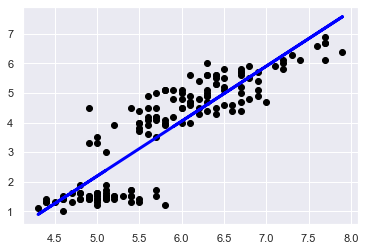

In [18]:
pred_y = model.predict(x_iris.iloc[:,0:1])
plt.scatter(x_iris.iloc[:,0:1],x_iris.iloc[:,2:3],  color='black')
plt.plot(x_iris.iloc[:,0:1], pred_y, color='blue', linewidth=3)
plt.show()

### 多项式回归

In [19]:
poly_reg = PolynomialFeatures(degree =10)  # 三次多项式
X_poly = poly_reg.fit_transform(x_iris.iloc[:,0:1])  # 升阶
print(X_poly.shape)
model = LinearRegression()
model.fit(X_poly,x_iris.iloc[:,2:3])

print(model.coef_)      # 系数
print(model.intercept_) # 截距
print(model.score(X_poly,x_iris.iloc[:,2:3]))  # R方

(150, 11)
[[ 0.00000000e+00 -1.47875702e+05 -1.13014919e+05  1.51712002e+05
  -7.38533730e+04  2.05798713e+04 -3.63475584e+03  4.15924035e+02
  -3.00225296e+01  1.24662330e+00 -2.27524862e-02]]
[260939.85637425]
0.8127253938379884


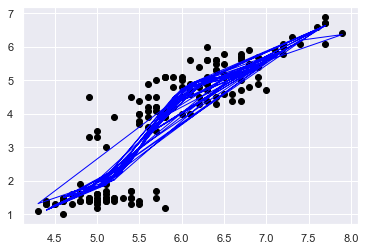

In [20]:
pred_y = model.predict(X_poly)
plt.scatter(x_iris.iloc[:,0:1],x_iris.iloc[:,2:3],  color='black')
plt.plot(x_iris.iloc[:,0:1], pred_y, color='blue', linewidth=1)
plt.show()

In [21]:
# 自变量
print("feature names")
print(poly_reg.get_feature_names())

feature names
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


### 朴素贝叶斯

In [22]:
model = GaussianNB()
model.fit(x_iris,y_iris)

GaussianNB()

In [23]:
ymodel = model.predict(x_iris)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_iris,ymodel)

0.9466666666666667

### 逻辑回归

In [25]:
logreg = LogisticRegression()
logreg.fit(x_iris, y_iris)

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

解决样本不均衡问题

In [ ]:
# lr = LogisticRegression(class_weight="balanced") # 解决样本不均衡问题

# penalty = {                                      # 自定义权重项
#     0: 5,
#     1: 1
# }

# lr = LogisticRegression(class_weight=penalty)

In [26]:
y_pred = logreg.predict(x_iris)

In [27]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

In [28]:
accuracy_score(y_iris,y_pred)

0.98

### 决策树

In [29]:
#  1.criterion  gini  or  entropy

#  2.splitter  best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）

#  3.max_features  None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

#  4.max_depth  数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

#  5.min_samples_split  如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分
#                       如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

#  6.min_samples_leaf  这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被
#                      剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

#  7.min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起
#                          被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，
#                          或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

#  8.max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。
#                   如果加了限制，算法会建立在最大叶子节点数内最优的决策树。
#                   如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制
#                   具体的值可以通过交叉验证得到。

#  9.class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多
#                 导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重
#                 如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

#  10.min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度
#                       (基尼系数，信息增益，均方差，绝对差)小于这个阈值
#                       则该节点不再生成子节点。即为叶子节点 。

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_iris,y_iris)
y_pred = decision_tree_classifier.predict(x_iris)

In [31]:
accuracy_score(y_iris,y_pred)

1.0

In [32]:
decision_tree_classifier.score(x_iris,y_pred)

1.0

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


Text(0.5, 1.0, 'Average score: 0.9533333333333334')

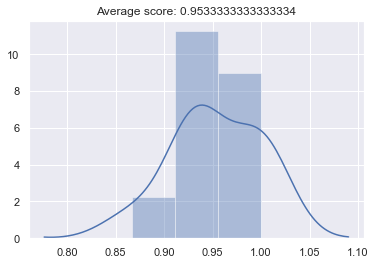

In [33]:
# 交叉验证得分
from sklearn.model_selection import cross_val_score
import numpy as np
decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier,x_iris, y_iris, cv=10)
print (cv_scores)
#kde=False
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### 随机森林

In [34]:
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

predictors = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# kf = KFold(n_splits=3,random_state=1)
scores = cross_val_score(alg, iris[predictors], iris["species"], cv=5)
print(scores.mean())

0.9666666666666668


In [35]:
alg.fit(x_iris,y_iris)
y_pred = alg.predict(x_iris)
accuracy_score(y_iris,y_pred)

1.0

In [108]:
iris = sns.load_dataset('iris')

In [109]:
print (iris["species"].unique())
iris["species"] = iris["species"].fillna('S')
iris.loc[iris["species"] == 'setosa'] = 0
iris.loc[iris["species"] == 'versicolor'] = 0
iris.loc[iris["species"] == 'virginica'] = 1

['setosa' 'versicolor' 'virginica']


In [110]:
# x_iris = iris.drop('species',axis=1)
x_iris = iris.iloc[:,0:4]
y_iris = iris.species
print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_iris,y_iris,test_size = 0.3, random_state = 0)

print("原始数据特征:",x_iris.shape,
      ",训练数据特征:",x_train.shape,
      ",测试数据特征:",x_test.shape)
 
print("原始数据标签:",y_iris.shape,
      ",训练数据标签:",y_train.shape,
      ",测试数据标签:",y_test.shape)

原始数据特征: (150, 4) ,训练数据特征: (105, 4) ,测试数据特征: (45, 4)
原始数据标签: (150,) ,训练数据标签: (105,) ,测试数据标签: (45,)


In [112]:
x_train = x_train.astype('int')
x_test = x_test.astype('int')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

#### 随机森林调参

In [50]:
print('Finding best n_estimators for RandomForestClassifier...')
min_score =100000
best_n = 0
scores_n = []
range_n = np.logspace(0,2,num=15).astype(int)
# range_n = range(1,100)
for n in range_n:
    print("the number of trees : {0}".format(n))
    t1 = time.time()
    
    rfc_score = 0.
    rfc = RandomForestClassifier(n_estimators=n)
    kf = KFold(n_splits=6,shuffle=True)
    for train_k,test_k in kf.split(x_train):
        rfc.fit(x_train.iloc[train_k],y_train.iloc[train_k])
        pred = rfc.predict(x_train.iloc[test_k])
        rfc_score += log_loss(y_train.iloc[test_k], pred) / 10
    scores_n.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n
    
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(n, t2-t1))
    print(scores_n)
print(best_n,min_score)

Finding best n_estimators for RandomForestClassifier...
the number of trees : 1
Done processing 1 trees (0.028sec)
[5.995204332975849e-16]
the number of trees : 1
Done processing 1 trees (0.024sec)
[5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 1
Done processing 1 trees (0.024sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 2
Done processing 2 trees (0.030sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 3
Done processing 3 trees (0.034sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 5
Done processing 5 trees (0.045sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 7
Done processing 7 trees (0.056sec)
[5.995204332975849e-16, 5.995204332975849e

Text(0.5, 0, 'number of trees')

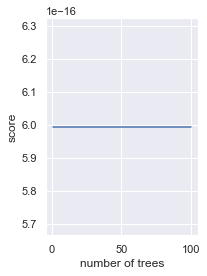

In [44]:
plt.subplot(121)
plt.plot(range_n, scores_n)
plt.ylabel('score')
plt.xlabel('number of trees') 

In [53]:
print('Finding best n_estimators for RandomForestClassifier...')
min_score =100000
best_m = 0
scores_m = []
range_m = np.logspace(0,2,num=15).astype(int)
# range_n = range(1,100)
for n in range_n:
    print("the number of trees : {0}".format(n))
    t1 = time.time()
    
    rfc_score = 0.
    rfc = RandomForestClassifier(n_estimators=n)
    kf = KFold(n_splits=6,shuffle=True)
    for train_k,test_k in kf.split(x_train):
        rfc.fit(x_train.iloc[train_k],y_train.iloc[train_k])
        pred = rfc.predict(x_train.iloc[test_k])
        rfc_score += log_loss(y_train.iloc[test_k], pred) / 10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n
    
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(n, t2-t1))
    print(scores_n)
print(best_n,min_score)

Finding best n_estimators for RandomForestClassifier...
the number of trees : 1
Done processing 1 trees (0.028sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 1
Done processing 1 trees (0.024sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16]
the number of trees : 1
Done processing 1 trees (0.024sec)
[5.995204332975849e-16, 5.995204332975849e-16, 5.995204332975849e-16, 5.995

Text(0.5, 0, 'max depth')

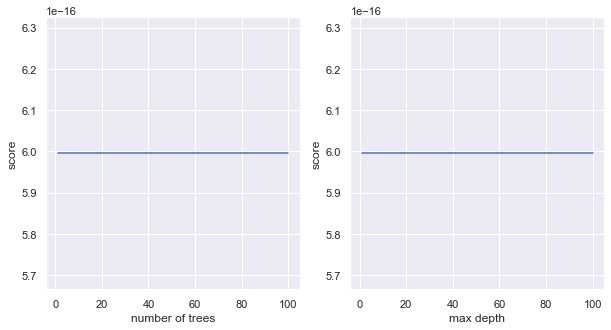

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n, scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

plt.subplot(122)
plt.plot(range_m, scores_m)
plt.ylabel('score')
plt.xlabel('max depth')

In [56]:
# model = RandomForestClassifier(n_estimators=best_n, max_depth=best_m)
# model.fit(x_train, y_train)

## 特征重要性评估

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif # 选择最好特征

In [59]:
#鸢尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target

In [94]:
selector = SelectKBest(f_classif,k=3)
selector.fit(x,y)
scores = -np.log10(selector.pvalues_)
a =sorted(scores,reverse=True)
a

[90.54412371846203, 84.37992166321905, 30.7773695664891, 16.34755859593492]

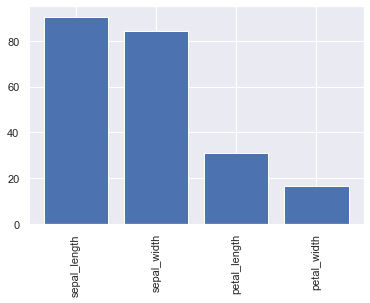

In [95]:
plt.bar(range(4), a)
plt.xticks(range(4), predictors, rotation='vertical')
plt.show()

## 正则惩罚

### 示例

In [101]:
def printing_Kfold_scores(x_train_data,y_train_data):
#     fold = KFold(len(y_train_data),5,shuffle=False) 
    fold = KFold(n_splits=5,shuffle=False) 
    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(  len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter(正则化惩罚力度): ', c_param)
        print('-------------------------------------------')
        print('')
 
        recall_accs = []
        for iteration, indices in enumerate(fold.split(y_train_data),start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score（平均召回率） ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].values.argmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


In [103]:
# 案例
# lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
# lr.fit(X_train_undersample,y_train_undersample.values.ravel())
# y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

# thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# plt.figure(figsize=(10,10))

# j = 1
# for i in thresholds:
#     y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
#     plt.subplot(3,3,j)
#     j += 1
    
#     # Compute confusion matrix
#     cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
#     np.set_printoptions(precision=2)

#     print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

#     # Plot non-normalized confusion matrix
#     class_names = [0,1]
#     plot_confusion_matrix(cnf_matrix
#                           , classes=class_names
#                           , title='Threshold >= %s'%i) 

(150, 4)
(150,)


In [114]:
# best_c = printing_Kfold_scores(x_iris,y_iris)

## 混淆矩阵

### 示例

In [3]:
# cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
# np.set_printoptions(precision=2)

# print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# # Plot non-normalized confusion matrix
# class_names = [0,1]
# plt.figure()
# plot_confusion_matrix(cnf_matrix
#                       , classes=class_names
#                       , title='Confusion matrix')
# plt.show()